* 더 자세한 EDA 코드는 현재 jupyter lab의 셈플파일인 아래 파일을 참고하세요. 
  - /sample-notebooks/applying_machine_learning/house_price_prediction/house_price_prediction_regularization_stacking.ipynb 


***
# 표준 라이브러리 로딩

In [1]:
!pip install seaborn==0.11

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')



In [3]:
a = pd.read_csv('/home/work/data.csv')

In [4]:
#모든 칼럼을 명시하기 위한 설정값
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
a.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2,160946.06,C55875088,23325.00,0.00,C1600372537,0.0,160946.06,0
1,2,141912.07,C1898347385,94621.00,0.00,C1423158381,0.0,236165.93,0
2,2,89103.20,C1696536276,101262.00,12158.80,C552306523,0.0,89103.20,0
3,1,22380.14,C1986772602,1123.00,23503.14,C59283335,0.0,0.00,0
4,4,15909.42,C1191857750,368375.92,352466.50,M1687701357,0.0,0.00,0


In [6]:
print('training set 데이터 모양: %s rows and %s features'%(a.shape[0],a.shape[1]))


training set 데이터 모양: 5090096 rows and 9 features


# Correlation 

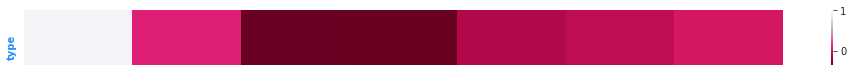

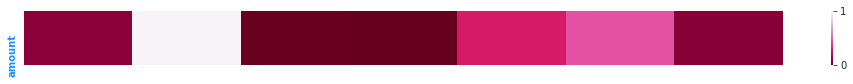

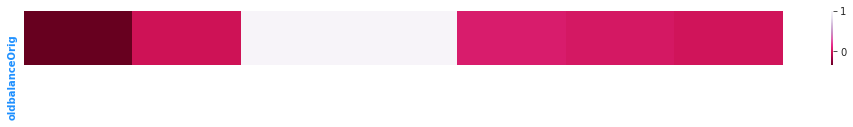

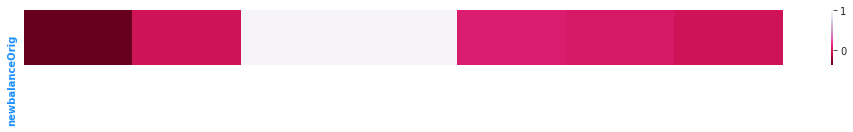

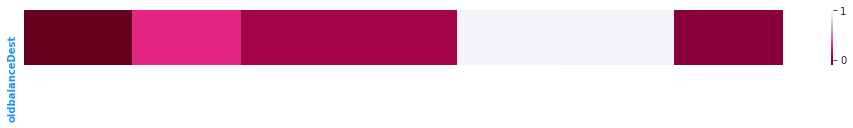

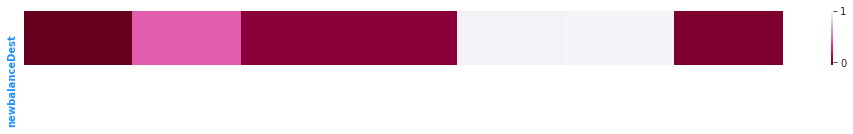

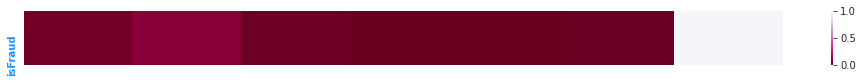

In [7]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()

columns=["type","amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]
for col in columns:
    f,ax=plt.subplots(figsize=(17,1))
    sns.heatmap(numcorr.sort_values(by=[col], ascending=False).head(1), cmap='PuRd_r')
    plt.tick_params(axis='x',      labelbottom=False)
    plt.yticks(weight='bold', color='dodgerblue', rotation=90)
    plt.show()

In [8]:
def corr_simple_table(target_column, num):
  Num=numcorr[target_column].sort_values(ascending=False).head(num).to_frame()
  cm = sns.light_palette("cyan", as_cmap=True)
  s = Num.style.background_gradient(cmap=cm)
  return s
corr_simple_table('isFraud',10)

,isFraud
isFraud,1.000000
amount,0.077226
type,0.020809
oldbalanceOrig,0.010130
newbalanceDest,0.000391
oldbalanceDest,-0.006005
newbalanceOrig,-0.008154


In [9]:
Num=numcorr['isFraud'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,isFraud
isFraud,1.000000
amount,0.077226
type,0.020809
oldbalanceOrig,0.010130
newbalanceDest,0.000391
oldbalanceDest,-0.006005
newbalanceOrig,-0.008154


# Simple scatter plot

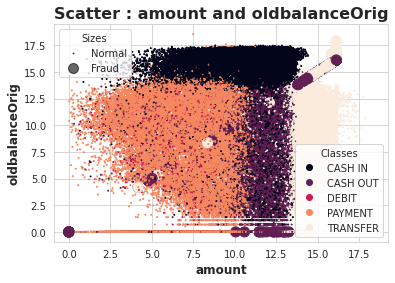

In [10]:
color=a['type']
size=a['isFraud']*100+1  # fraud가 적어서 잘보이도록 크기를 키움
x='amount'
y='oldbalanceOrig'

fig, ax = plt.subplots()

plt.title(f'Scatter : {x} and {y}', weight='bold', fontsize=16)
plt.xlabel(x, weight='bold', fontsize=12)
plt.ylabel(y, weight='bold', fontsize=12)

scatter = ax.scatter(x=np.log(1 + a[x]), y=np.log(1 + a[y]), c=color,s=size)

handles=scatter.legend_elements()[0]
labels = ["CASH IN","CASH OUT", "DEBIT", "PAYMENT", "TRANSFER"]
legend1 = ax.legend(handles,labels,loc="lower right", title="Classes")
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
labels=['Normal','Fraud']
legend2 = ax.legend(handles, labels, loc="upper left", title="Sizes")

plt.show()
